In [1]:
import pandas as pd

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#visualize
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [4]:
indep = pd.DataFrame(df, columns = ["age","bmi","children","smoker"])
dep = pd.DataFrame(df, columns = ["charges"])

In [5]:
dep.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [6]:
lm = linear_model.LinearRegression()
model = lm.fit(indep, dep)

In [7]:
lm.score(indep, dep)

0.749694530346479

In [8]:
predictions = lm.predict(indep)

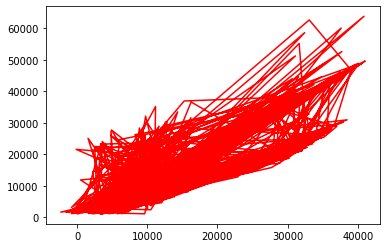

In [9]:
plt.plot(predictions, dep, color='r')
plt.show()

In [10]:
df2 = pd.DataFrame(preprocessing.scale(df,with_mean=False))
df2.columns=df.columns
df2

,age,bmi,children,smoker,charges
0,1.352823,4.576841,0.000000,2.47805,1.394816
1,1.281621,5.539782,0.829846,0.00000,0.142543
2,1.993633,5.413468,2.489539,0.00000,0.367558
3,2.349639,3.724630,0.000000,0.00000,1.816075
4,2.278438,4.737605,0.000000,0.00000,0.319430
...,...,...,...,...,...
1333,3.560060,5.080458,2.489539,0.00000,0.875681
1334,1.281621,5.236300,0.000000,0.00000,0.182230
1335,1.281621,6.045039,0.000000,0.00000,0.134636
1336,1.495225,4.232348,0.000000,0.00000,0.165871


In [11]:
indep = pd.DataFrame(df2, columns = ["age","bmi","children","smoker"])
dep = pd.DataFrame(df2, columns = ["charges"])

In [12]:
dep.head()

,charges
0,1.394816
1,0.142543
2,0.367558
3,1.816075
4,0.319430


In [13]:
lm = linear_model.LinearRegression()
model = lm.fit(indep, dep)

In [14]:
lm.score(indep, dep)

0.7496945303464789

In [15]:
predictions = lm.predict(indep)

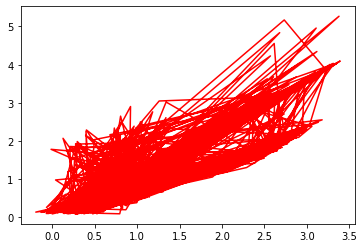

In [16]:
plt.plot(predictions, dep, color='r')
plt.show()

In [18]:
df_train, df_test = train_test_split(df2, test_size=0.25)

In [19]:
df_test.head()

,age,bmi,children,smoker,charges
980,3.844864,4.176572,0.829846,0.0,2.107897
871,1.851231,4.836031,0.829846,0.0,0.280234
95,1.993633,6.171353,0.829846,0.0,0.311172
326,1.922432,3.807472,0.829846,0.0,0.294238
844,3.773663,5.002536,0.000000,0.0,0.832024


In [20]:
indep_train = pd.DataFrame(df_train, columns = ["age","bmi","children","smoker"])
indep_test = pd.DataFrame(df_test, columns = ["age","bmi","children","smoker"])

dep_train = pd.DataFrame(df_train, columns = ["charges"])
dep_test = pd.DataFrame(df_test, columns = ["charges"])

In [21]:
lm = linear_model.LinearRegression()
model = lm.fit(indep_train, dep_train)

In [22]:
lm.score(indep_test, dep_test)

0.770381677570878

In [23]:
lm.coef_

array([[0.28959418, 0.15075802, 0.04906706, 0.78850373]])

In [24]:
predictions = lm.predict(indep_test)

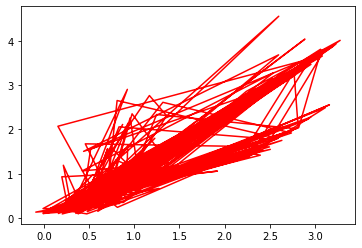

In [25]:
plt.plot(predictions, dep_test, color='r')
plt.show()